In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import random

In [2]:
image = cv2.imread("test_bad.jpg")

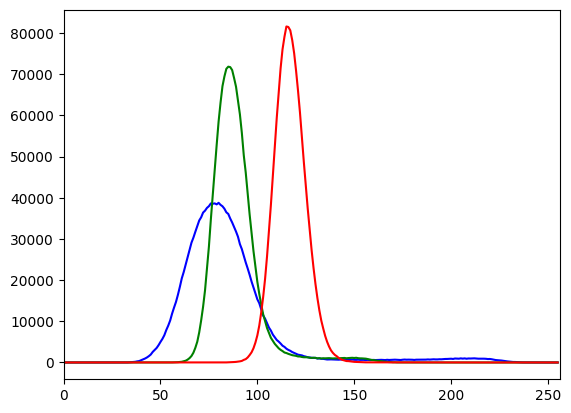

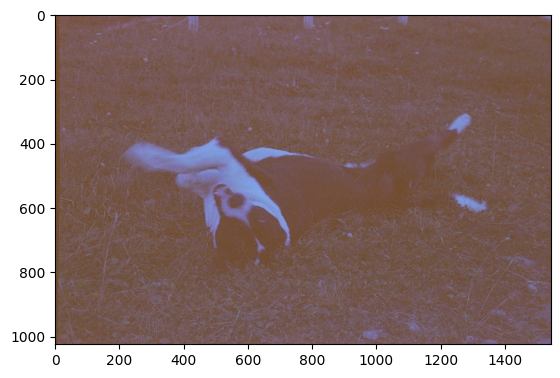

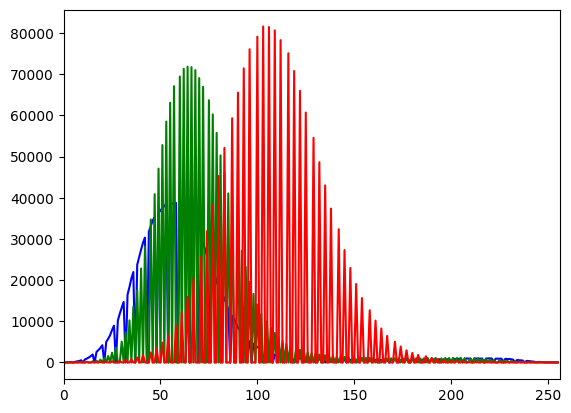

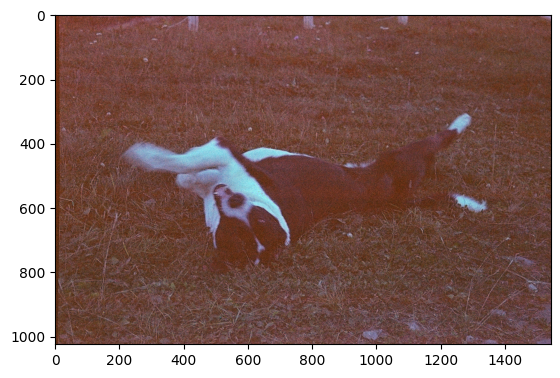

In [20]:
def printHist(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()
def expendLayer(arr):
    hist = cv2.calcHist([arr],[0],None,[256],[0,256])
    for i in range(len(hist)): 
        if hist[i]>10:
            #print(i)
            ymin = i
            break
    for i in range(255,0,-1):
        if hist[i]>10:
            #print(i)
            ymax = i
            break
    newarr = np.zeros(arr.shape, dtype = "uint8")
    hist = cv2.calcHist([arr],[0],None,[256],[0,256])
    for x in range(len(arr)):
        for y in range(len(arr[x])):
            newarr[x,y] = (arr[x,y]-ymin)*255/(ymax-ymin)
    return newarr
def expendRGB(image):
    (b, g, r) = cv2.split(image)
    merged_rgb = cv2.merge([r,g,b])
    printHist(image)
    plt.imshow(merged_rgb); plt.show()
    b = expendLayer(b)
    g = expendLayer(g)
    r = expendLayer(r)
    merged_rgb = cv2.merge([r,g,b])
    merged_bgr = cv2.merge([b,g,r]) 
    printHist(merged_bgr)
    cv2.imwrite("test_good.jpg", merged_bgr)
    plt.imshow(merged_rgb); plt.show()
    return merged_bgr
    #plt.hist(merged_rgb.ravel(),256,[0,256]); plt.show()
newImage = expendRGB(image)

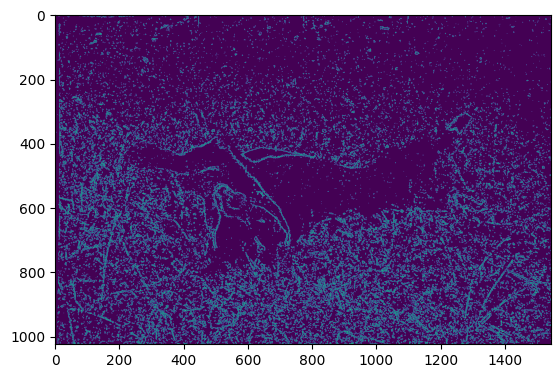

In [21]:
gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
t_lower = int(gray.mean()*8/3)  # Lower Threshold
t_upper = int(gray.mean()*6/3)  # Upper threshold
# Applying the Canny Edge filter
edge = cv2.Canny(gray, t_lower, t_upper)
plt.imshow(edge); plt.show()